# <span style="color:red"> Lecture 16 - Merging Data </span>

<font size = "5">

In the previous class we covered ...

- Grouping Data
- Aggregating statistics
- Grouping + Aggregating (11:30am section)

In this class we will cover ...

- Grouping + Aggregating (1:00pm section)
- Merging DataFrames
- Importance of inspecting data before merging

First, let's pick up where we left off from last time...

[Link to Data Source](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_results = pd.read_csv("f1_data_raw/results.csv")

In [17]:
# Grouping... 
driver_group = df_results.groupby(by = "driverId")
constructor_group = df_results.groupby(by = "constructorId")

driver_mean_points = driver_group["points"].mean()
mean_pts_sorted = driver_mean_points.sort_values(ascending = False)
top_5_drivers = mean_pts_sorted.iloc[:5]

mean_pts_position = driver_group[["points", "positionOrder"]].mean()

top5_one_line = df_results.groupby(by = "driverId")["points"].mean().\
    sort_values(ascending=False).iloc[:5]


In [18]:
# Aggregating...
pts_col = df_results["points"]

pts_stats = pts_col.agg( ["mean", "std", "min", "max"] )

results_agg = df_results.agg(mean_points = ('points','mean'),
                          sd_points =   ('points','std'),
                          min_points =  ('points','min'),
                          max_points =  ('points','max'))


count_unique = lambda col: len(col.unique())
results_agg = df_results.agg(mean_points = ('points','mean'),
                          mean_laps =   ('laps','mean'),
                          min_points =  ('points','min'),
                          max_points =  ('points','max'),
                          num_drivers = ('driverId', count_unique))

# <span style="color:red"> III. Grouping + Aggregating </span>


<img src="figures/agg.png" alt="drawing" width="400"/>

In [19]:
drivers_agg = (df_results.groupby("driverId")
                      .agg(mean_points = ('points','mean'),
                           sd_points =   ('points','std'),
                           min_points =  ('points','min'),
                           max_points =  ('points','max'),
                           appearances   = ('points',len)))

print(type(drivers_agg))
print(drivers_agg)

<class 'pandas.core.frame.DataFrame'>
          mean_points  sd_points  min_points  max_points  appearances
driverId                                                             
1           14.313953   9.246906         0.0        50.0          301
2            1.407609   2.372923         0.0        15.0          184
3            7.740291   8.672456         0.0        25.0          206
4            5.790831   6.372925         0.0        25.0          349
5            0.937500   1.969503         0.0        10.0          112
...               ...        ...         ...         ...          ...
851          0.000000        NaN         0.0         0.0            1
852          1.228571   2.734160         0.0        12.0           35
853          0.000000   0.000000         0.0         0.0           22
854          0.342857   1.493965         0.0         8.0           35
855          0.384615   1.120897         0.0         4.0           13

[854 rows x 5 columns]


In [20]:
# driverId is the "Index" column, NOT a regular column
print(drivers_agg.columns.values)

['mean_points' 'sd_points' 'min_points' 'max_points' 'appearances']


<font size = "4" >

Groupby + Aggregate statistics (multigroup)

Each constructor can have multiple vehicles competing in a given race. We'll group by Race ID and Constructor ID, then aggregate statistics. This will allow us to see how each constructor did relative to the others in a given race.

In [21]:
teamrace_agg = (df_results.groupby(  ["raceId","constructorId"]    )
                       .agg(mean_points = ('points','mean'),
                            sd_points =   ('points','std'),
                            min_points =  ('points','min'),
                            max_points =  ('points','max'),
                            cars_entered   = ('points',len)))

display(teamrace_agg)
# print(teamrace_agg)

mean_points  sd_points  min_points  max_points  \
raceId constructorId                                                   
1      1                      0.0   0.000000         0.0         0.0   
       2                      0.0   0.000000         0.0         0.0   
       3                      1.5   2.121320         0.0         3.0   
       4                      2.0   2.828427         0.0         4.0   
       5                      1.5   0.707107         1.0         2.0   
...                           ...        ...         ...         ...   
1086   117                    0.5   0.707107         0.0         1.0   
       131                   17.0   2.828427        15.0        19.0   
       210                    0.0   0.000000         0.0         0.0   
       213                    0.0   0.000000         0.0         0.0   
       214                    3.0   1.414214         2.0         4.0   

                      cars_entered  
raceId constructorId                
1      1                         2  
       2                         2  
       3                         2  
       4                         2  
       5                         2  
...                            ...  
1086   117                       2  
       131                       2  
       210                       2  
       213                       2  
       214                       2  

[12478 rows x 5 columns]

<font size = "4">

Filtering + Grouping + Aggregating: <br>

```python 
.query().groupby().agg()
```

- Another example of "chaining"

In [22]:
# The following gets a subset of the data using .query()
# In this case we subset the data before computing aggregate statistics
# Note: "filtering" is often the word used to obtain a subset

teamrace_agg500 = (df_results.query("raceId >= 500")
                       .groupby(["raceId","constructorId"])
                        .agg(mean_points = ('points','mean'),
                             sd_points =   ('points','std'),
                             min_points =  ('points','min'),
                             max_points =  ('points','max'),
                             cars_entered   = ('points',len)))
display(teamrace_agg500)

mean_points  sd_points  min_points  max_points  \
raceId constructorId                                                   
500    1                      0.0   0.000000         0.0         0.0   
       3                      1.0   1.414214         0.0         2.0   
       4                      4.5   6.363961         0.0         9.0   
       6                      0.0   0.000000         0.0         0.0   
       21                     0.5   0.707107         0.0         1.0   
...                           ...        ...         ...         ...   
1086   117                    0.5   0.707107         0.0         1.0   
       131                   17.0   2.828427        15.0        19.0   
       210                    0.0   0.000000         0.0         0.0   
       213                    0.0   0.000000         0.0         0.0   
       214                    3.0   1.414214         2.0         4.0   

                      cars_entered  
raceId constructorId                
500    1                         2  
       3                         2  
       4                         2  
       6                         2  
       21                        2  
...                            ...  
1086   117                       2  
       131                       2  
       210                       2  
       213                       2  
       214                       2  

[5965 rows x 5 columns]

In [23]:
# maybe we're only interested in the mean
mean_race500 = (df_results.query("raceId >= 500").groupby(["raceId","constructorId"]).
    agg(mean_points = ('points','mean')))

display(mean_race500)
print(type(mean_race500))

mean_points
raceId constructorId             
500    1                      0.0
       3                      1.0
       4                      4.5
       6                      0.0
       21                     0.5
...                           ...
1086   117                    0.5
       131                   17.0
       210                    0.0
       213                    0.0
       214                    3.0

[5965 rows x 1 columns]

<class 'pandas.core.frame.DataFrame'>


<font size = "4">

**Exercise:** Perform the following by chaining. Create a DataFrame where for each race (identified by "raceId") we aggregate the average number of laps and the average number of points.

In [24]:
# your answer here

exercise_1 = (df_results.groupby("raceId")
                        .agg(mean_laps = ('laps','mean'),
                             mean_points = ('points','mean')))

print(exercise_1)

        mean_laps  mean_points
raceId                        
1           50.25        1.950
2           27.70        0.975
3           51.15        1.950
4           56.25        1.950
5           47.10        1.950
...           ...          ...
1082        63.10        5.100
1083        40.55        5.100
1084        66.15        5.100
1085        47.65        5.100
1086        69.10        5.100

[1070 rows x 2 columns]


<font size = "4">

**Exercise:** Perform the following by chaining. For each constructor (identified by "constructorId"), aggregate the average number of points, then sort in descending order.

- First, begin the chain with the variable ``constructor_group``, we defined above.
- Then, begin the chain with the variable ``df_results``

In [25]:
# your code here

sorted_data_1 = (constructor_group.agg(mean_points = ("points", "mean"))
                                  .sort_values("mean_points", ascending = False))


sorted_data_2 = (df_results.groupby("constructorId")
                           .agg(mean_points = ('points','mean'))
                           .sort_values("mean_points",ascending = False))

print(sorted_data_1)
print(sorted_data_2)


               mean_points
constructorId             
131              12.410775
9                 8.889381
23                5.058824
208               4.584416
6                 4.261172
...                    ...
76                0.000000
77                0.000000
78                0.000000
130               0.000000
112               0.000000

[210 rows x 1 columns]
               mean_points
constructorId             
131              12.410775
9                 8.889381
23                5.058824
208               4.584416
6                 4.261172
...                    ...
76                0.000000
77                0.000000
78                0.000000
130               0.000000
112               0.000000

[210 rows x 1 columns]


# <span style="color:red"> Merging </span>


<img src="figures/merge_stats.png" alt="drawing" width="600"/>

<font size = "4">

We have the original DataFrame ("df_results"), and we have aggregate statistics for each driver ("drivers_agg"). We'll merge these two together

In [26]:
display(df_results.head())

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [27]:
display(drivers_agg.head())

,mean_points,sd_points,min_points,max_points,appearances
driverId,,,,,
1,14.313953,9.246906,0.0,50.0,301
2,1.407609,2.372923,0.0,15.0,184
3,7.740291,8.672456,0.0,25.0,206
4,5.790831,6.372925,0.0,25.0,349
5,0.937500,1.969503,0.0,10.0,112


In [28]:
# This command merges the "aggregate" information in "driver_agg" into
# "df_results" similar as the figure above.
# The merging variable "on" is determined by "driverId", which is a column
# that is common to both DataFrames
# "how = left" indicates that the left DataFrame is the baseline

results_merge = pd.merge(left = df_results,
                         right = drivers_agg,
                         on = "driverId",
                         how = "left")

In [29]:
display(results_merge)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,mean_points,sd_points,min_points,max_points,appearances
0,1,18,1,1,22,1,1,1,1,10.0,...,39,2,1:27.452,218.300,1,14.313953,9.246906,0.0,50.0,301
1,2,18,2,2,3,5,2,2,2,8.0,...,41,3,1:27.739,217.586,1,1.407609,2.372923,0.0,15.0,184
2,3,18,3,3,7,7,3,3,3,6.0,...,41,5,1:28.090,216.719,1,7.740291,8.672456,0.0,25.0,206
3,4,18,4,4,5,11,4,4,4,5.0,...,58,7,1:28.603,215.464,1,5.790831,6.372925,0.0,25.0,349
4,5,18,5,1,23,3,5,5,5,4.0,...,43,1,1:27.418,218.385,1,0.937500,1.969503,0.0,10.0,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25655,25661,1086,825,210,20,13,16,16,16,0.0,...,37,15,1:23.511,188.856,11,1.330827,2.846374,0.0,18.0,133
25656,25662,1086,848,3,23,17,17,17,17,0.0,...,43,12,1:23.047,189.911,11,3.921569,4.853218,0.0,15.0,51
25657,25663,1086,849,3,6,19,18,18,18,0.0,...,60,8,1:22.478,191.221,11,0.134615,0.840841,0.0,6.0,52
25658,25664,1086,852,213,22,16,19,19,19,0.0,...,58,16,1:23.538,188.795,12,1.228571,2.734160,0.0,12.0,35


<font size = "4">

**Exercise:** Compute a scatter plot of "mean_points" (horizontal axis) vs. "points" (vertical axis). This plot tries to describe how much a driver's performance in individual races deviates from their overall average.

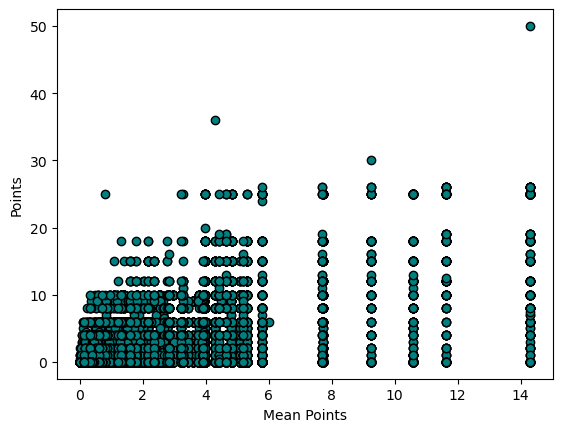

In [31]:
# your code here

plt.scatter(results_merge["mean_points"], results_merge["points"], 
    color = "teal", edgecolor = "black")
plt.xlabel("Mean Points")
plt.ylabel("Points")
plt.show()


<font size = "4">

**Exercise:** Merge the "teamrace_agg" data into "df_results". This time use the option:

```python
        on = ["raceId","constructorId"]
```

In [32]:
# your code here

merge_ex = pd.merge(left = df_results, right = teamrace_agg, 
                    on = ["raceId", "constructorId"], how = "left")

display(merge_ex)


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,mean_points,sd_points,min_points,max_points,cars_entered
0,1,18,1,1,22,1,1,1,1,10.0,...,39,2,1:27.452,218.300,1,7.0,4.242641,4.0,10.0,2
1,2,18,2,2,3,5,2,2,2,8.0,...,41,3,1:27.739,217.586,1,4.0,5.656854,0.0,8.0,2
2,3,18,3,3,7,7,3,3,3,6.0,...,41,5,1:28.090,216.719,1,4.5,2.121320,3.0,6.0,2
3,4,18,4,4,5,11,4,4,4,5.0,...,58,7,1:28.603,215.464,1,2.5,3.535534,0.0,5.0,2
4,5,18,5,1,23,3,5,5,5,4.0,...,43,1,1:27.418,218.385,1,7.0,4.242641,4.0,10.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25655,25661,1086,825,210,20,13,16,16,16,0.0,...,37,15,1:23.511,188.856,11,0.0,0.000000,0.0,0.0,2
25656,25662,1086,848,3,23,17,17,17,17,0.0,...,43,12,1:23.047,189.911,11,0.0,0.000000,0.0,0.0,2
25657,25663,1086,849,3,6,19,18,18,18,0.0,...,60,8,1:22.478,191.221,11,0.0,0.000000,0.0,0.0,2
25658,25664,1086,852,213,22,16,19,19,19,0.0,...,58,16,1:23.538,188.795,12,0.0,0.000000,0.0,0.0,2


# <span style="color:red"> More on Merging </span>

<font size = "4">

We already loaded in "results.csv". Let's load in "circuits.csv" and "races.csv"

In [33]:
df_races    = pd.read_csv("f1_data_raw/races.csv")
df_circuits = pd.read_csv("f1_data_raw/circuits.csv")

<font size = "4">

- Multi-file datasets can be visualized with an "Entity Relationship Diagram" (ERD). 
- Depicts how the identifiers in each table are connected.


<img src="figures/erd_f1_simple.png" alt="drawing" width="600"/>

<font size = "4">

- We will try to merge together information on each circuit with the data on individual races.


In [34]:
print(df_races.columns.values)
print()
print(df_circuits.columns.values)

['raceId' 'year' 'round' 'circuitId' 'name' 'date' 'time' 'url' 'fp1_date'
 'fp1_time' 'fp2_date' 'fp2_time' 'fp3_date' 'fp3_time' 'quali_date'
 'quali_time' 'sprint_date' 'sprint_time']

['circuitId' 'circuitRef' 'name' 'location' 'country' 'lat' 'lng' 'alt'
 'url']


<font size = "4">

- Both DataFrames have a "name" column. 
- But one refers to the name of the track, the other the name of the race.

In [35]:
race_names = df_races["name"].sort_values().unique()
circuit_names = df_circuits["name"].sort_values().unique()

In [36]:
print(race_names)

['70th Anniversary Grand Prix' 'Abu Dhabi Grand Prix'
 'Argentine Grand Prix' 'Australian Grand Prix' 'Austrian Grand Prix'
 'Azerbaijan Grand Prix' 'Bahrain Grand Prix' 'Belgian Grand Prix'
 'Brazilian Grand Prix' 'British Grand Prix' 'Caesars Palace Grand Prix'
 'Canadian Grand Prix' 'Chinese Grand Prix' 'Dallas Grand Prix'
 'Detroit Grand Prix' 'Dutch Grand Prix' 'Eifel Grand Prix'
 'Emilia Romagna Grand Prix' 'European Grand Prix' 'French Grand Prix'
 'German Grand Prix' 'Hungarian Grand Prix' 'Indian Grand Prix'
 'Indianapolis 500' 'Italian Grand Prix' 'Japanese Grand Prix'
 'Korean Grand Prix' 'Luxembourg Grand Prix' 'Malaysian Grand Prix'
 'Mexican Grand Prix' 'Mexico City Grand Prix' 'Miami Grand Prix'
 'Monaco Grand Prix' 'Moroccan Grand Prix' 'Pacific Grand Prix'
 'Pescara Grand Prix' 'Portuguese Grand Prix' 'Qatar Grand Prix'
 'Russian Grand Prix' 'Sakhir Grand Prix' 'San Marino Grand Prix'
 'Saudi Arabian Grand Prix' 'Singapore Grand Prix'
 'South African Grand Prix' 'Spani

In [37]:
print(circuit_names)

['AVUS' 'Adelaide Street Circuit' 'Ain Diab' 'Aintree'
 'Albert Park Grand Prix Circuit' 'Autodromo Enzo e Dino Ferrari'
 'Autodromo Internazionale del Mugello' 'Autodromo Nazionale di Monza'
 'Autódromo Hermanos Rodríguez' 'Autódromo Internacional Nelson Piquet'
 'Autódromo Internacional do Algarve' 'Autódromo José Carlos Pace'
 'Autódromo Juan y Oscar Gálvez' 'Autódromo do Estoril'
 'Bahrain International Circuit' 'Baku City Circuit' 'Brands Hatch'
 'Buddh International Circuit' 'Charade Circuit' 'Circuit Bremgarten'
 'Circuit Gilles Villeneuve' 'Circuit Mont-Tremblant'
 'Circuit Park Zandvoort' 'Circuit Paul Ricard'
 'Circuit de Barcelona-Catalunya' 'Circuit de Monaco'
 'Circuit de Nevers Magny-Cours' 'Circuit de Pedralbes'
 'Circuit de Spa-Francorchamps' 'Circuit of the Americas'
 'Circuito da Boavista' 'Circuito de Jerez' 'Detroit Street Circuit'
 'Dijon-Prenois' 'Donington Park' 'Fair Park' 'Fuji Speedway'
 'Hockenheimring' 'Hungaroring' 'Indianapolis Motor Speedway'
 'Istanbul P

<font size = "4">

- If we merge together the names, then "name" will be an ambiguous label.
- Let's make new copies of the DataFrames with less ambiguous column labels


In [38]:
df_races_new = df_races.rename(columns = {"name" : "race_name"})
df_circuits_new = df_circuits.rename(columns = {"name" : "circuit_name"})

<font size = "5">

Goal: Merge datasets

<img src="figures/merge_goal.png" alt="drawing" width="500"/>


```python
pd.merge(data1,data2,on = ...,how = ...)
```

- Strive to merge only specific columns of data2
- Avoid merging all columns
- Keeping it simple gives you more control over the output

In [39]:
display(df_races_new[['raceId','circuitId']].head())
print()
display(df_circuits_new[["circuitId","circuit_name"]].head())

,raceId,circuitId
0,1,1
1,2,2
2,3,17
3,4,3
4,5,4


,circuitId,circuit_name
0,1,Albert Park Grand Prix Circuit
1,2,Sepang International Circuit
2,3,Bahrain International Circuit
3,4,Circuit de Barcelona-Catalunya
4,5,Istanbul Park


In [40]:
# The "pd.merge()" command combines the information from both datasets
# The first argument is the "primary" datasets
# The second argument is the "secondary" dataset
# The "on" is the common variable that is used for merging
# how = "left" tells Python that the left dataset is the primary one

races_merge = pd.merge(left = df_races_new[['raceId', 'circuitId']],
                       right = df_circuits_new[["circuitId", "circuit_name"]],
                       on = "circuitId",
                       how = "left")

display(races_merge.head())

,raceId,circuitId,circuit_name
0,1,1,Albert Park Grand Prix Circuit
1,2,2,Sepang International Circuit
2,3,17,Shanghai International Circuit
3,4,3,Bahrain International Circuit
4,5,4,Circuit de Barcelona-Catalunya


<font size = "4">

- Suppose I want a DataFrame with the columns:
    - "raceId", "year", "circuitId" from "races.csv"
    - "circuitId", "circuit_name", "location" from "circuits.csv"
- How should I perform the merge?

In [41]:
left_dset = df_races_new[["raceId", "year", "circuitId"]]
right_dset = df_circuits_new[['circuitId', 'circuit_name', 'location']]

races_merge = pd.merge(left = left_dset,
                        right = right_dset,
                        on = "circuitId",
                        how = "left")

display(races_merge.head())

,raceId,year,circuitId,circuit_name,location
0,1,2009,1,Albert Park Grand Prix Circuit,Melbourne
1,2,2009,2,Sepang International Circuit,Kuala Lumpur
2,3,2009,17,Shanghai International Circuit,Shanghai
3,4,2009,3,Bahrain International Circuit,Sakhir
4,5,2009,4,Circuit de Barcelona-Catalunya,Montmeló


<font size = "4">

- Below is another example of merging.
- Here we take "date" column from "races.csv" and merge it with the data from "results.csv"

In [42]:
# Another example of merging

results_merge = pd.merge(df_results,
                         df_races_new[["raceId","date"]],
                         on = "raceId",
                         how = "left")

display(results_merge.head())

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,date
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008-03-16
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,2008-03-16
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,2008-03-16
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,2008-03-16
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,2008-03-16


<font size = "5">
<span style="color:red"> Common pitfall: </span> What happens if you don't rename?

In [43]:
display(df_races.head())
print()
display(df_circuits[["circuitId", "name"]].head())

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


,circuitId,name
0,1,Albert Park Grand Prix Circuit
1,2,Sepang International Circuit
2,3,Bahrain International Circuit
3,4,Circuit de Barcelona-Catalunya
4,5,Istanbul Park


In [44]:
# The following code merges the raw data
# which has the "name" column in "races_raw" and "circuits_raw"

races_merge_pitfall = pd.merge(df_races,
                               df_circuits[["circuitId","name"]],
                               on = "circuitId",
                               how = "left")

# Python will internally rename the columns "name_x" (for the left dataset)
# and "name_y" (for the right dataset)

print(races_merge_pitfall.columns.values)
display(races_merge_pitfall.head())

['raceId' 'year' 'round' 'circuitId' 'name_x' 'date' 'time' 'url'
 'fp1_date' 'fp1_time' 'fp2_date' 'fp2_time' 'fp3_date' 'fp3_time'
 'quali_date' 'quali_time' 'sprint_date' 'sprint_time' 'name_y']


,raceId,year,round,circuitId,name_x,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,name_y
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Albert Park Grand Prix Circuit
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Sepang International Circuit
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Shanghai International Circuit
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Bahrain International Circuit
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Circuit de Barcelona-Catalunya


In [45]:
# Since we made sure to rename the columns in the other DataFrames, this label collision won't happen

races_merge_consistent = pd.merge(df_races_new,
                               df_circuits_new[["circuitId","circuit_name"]],
                               on = "circuitId",
                               how = "left")


print(races_merge_consistent.columns.values)
display(races_merge_consistent.head())

['raceId' 'year' 'round' 'circuitId' 'race_name' 'date' 'time' 'url'
 'fp1_date' 'fp1_time' 'fp2_date' 'fp2_time' 'fp3_date' 'fp3_time'
 'quali_date' 'quali_time' 'sprint_date' 'sprint_time' 'circuit_name']


,raceId,year,round,circuitId,race_name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,circuit_name
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Albert Park Grand Prix Circuit
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Sepang International Circuit
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Shanghai International Circuit
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Bahrain International Circuit
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Circuit de Barcelona-Catalunya


<font size = "4">

**Exercise**: The Pandas ``.merge`` function has a keyword argument called ``suffixes`` which you can use to handle where two columns have the same label.

Use this keyword argument in the cell below to merge the two datasets with conflicting column names. Instead of the default "name_x" and "name_y", make the columns read "name_race" and "name_circuit"

Hint: type ``help(pd.merge)`` and see the examples

In [ ]:
races_merge_choose_suffix = pd.merge(df_races,
                               df_circuits[["circuitId","name"]],
                               on = "circuitId",
                               how = "left",
                               suffixes = ("_race","_circuit"))

display(races_merge_choose_suffix.head())

,raceId,year,round,circuitId,name_race,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,name_circuit
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Albert Park Grand Prix Circuit
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Sepang International Circuit
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Shanghai International Circuit
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Bahrain International Circuit
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Circuit de Barcelona-Catalunya


<font size = "4">

**Exercise**: Merge the columns "lat", "lng", and "alt" from "circuits.csv" into the DataFrame ``races_merge``.

In [48]:
# Your code here
ex_last = pd.merge(left = races_merge,
                    right = df_circuits[["circuitId", "lat", "lng", "alt"]],
                    on = "circuitId",
                    how = "left")

display(ex_last.head())

,raceId,year,circuitId,circuit_name,location,lat,lng,alt
0,1,2009,1,Albert Park Grand Prix Circuit,Melbourne,-37.84970,144.96800,10
1,2,2009,2,Sepang International Circuit,Kuala Lumpur,2.76083,101.73800,18
2,3,2009,17,Shanghai International Circuit,Shanghai,31.33890,121.22000,5
3,4,2009,3,Bahrain International Circuit,Sakhir,26.03250,50.51060,7
4,5,2009,4,Circuit de Barcelona-Catalunya,Montmeló,41.57000,2.26111,109
